**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from types import SimpleNamespace
import pandas as pd
from scipy.optimize import fsolve, minimize
import matplotlib.pyplot as plt

import exam1

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. I initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
# I meet the market clearing results
market_clearing_df = exam1.check_market_clearing(exam1.par, exam1.w)

print(market_clearing_df)


     p1        p2  Labor Market  Good 1 Market  Good 2 Market
0   0.1  0.100000     -0.993336       2.960008       6.973353
1   0.1  0.311111     -0.964482       3.003631       2.134667
2   0.1  0.522222     -0.906305       3.092988       1.143203
3   0.1  0.733333     -0.819428       3.229950       0.676954
4   0.1  0.944444     -0.704709       3.417090       0.384353
..  ...       ...           ...            ...            ...
95  2.0  1.155556      0.632803      -0.694772       0.654873
96  2.0  1.366667      0.784806      -0.677638       0.417416
97  2.0  1.577778      0.960666      -0.657396       0.224446
98  2.0  1.788889      1.159877      -0.633972       0.060411
99  2.0  2.000000      1.381966      -0.607295      -0.083688

[100 rows x 5 columns]


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [3]:
# I find the equilibrium prices
p1_eq, p2_eq = exam1.equilibrium_prices(exam1.par, exam1.w)

print(f'Equilibrium prices: p1 = {p1_eq:.4f}, p2 = {p2_eq:.4f}')


Equilibrium prices: p1 = 0.9759, p2 = 1.4908


Assume the government care about the social Ilfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [4]:
# I optimize the social welfare function
optimal_tau, optimal_T = exam1.optimize_social_welfare(exam1.par, exam1.w)

print(f'Optimal tau: {optimal_tau:.2f}, Optimal T: {optimal_T:.2f}')


/Users/thomaskalving/Library/Mobile Documents/com~apple~CloudDocs/Desktop/projects-2024-tbm527/examproject/exam1.py:34: RuntimeWarning: invalid value encountered in power
  return - (np.log(c1**par.alpha * c2**(1 - par.alpha)) - par.nu * l**(1 + par.epsilon) / (1 + par.epsilon))


Optimal tau: 0.00, Optimal T: 10.42


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [5]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [6]:
# I simulate the utilities
expected_utilities = np.zeros(par.J)
average_realized_utilities = np.zeros(par.J)

for j in range(par.J):
    epsilon = np.random.normal(0, par.sigma, (par.K,))
    u_ki_j = par.v[j] + epsilon
    expected_utilities[j] = par.v[j]
    average_realized_utilities[j] = np.mean(u_ki_j)

print("Expected utilities for each career choice:", expected_utilities)
print("Average realized utilities for each career choice:", average_realized_utilities)

Expected utilities for each career choice: [1. 2. 3.]
Average realized utilities for each career choice: [0.97733091 1.97936119 2.97303331]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

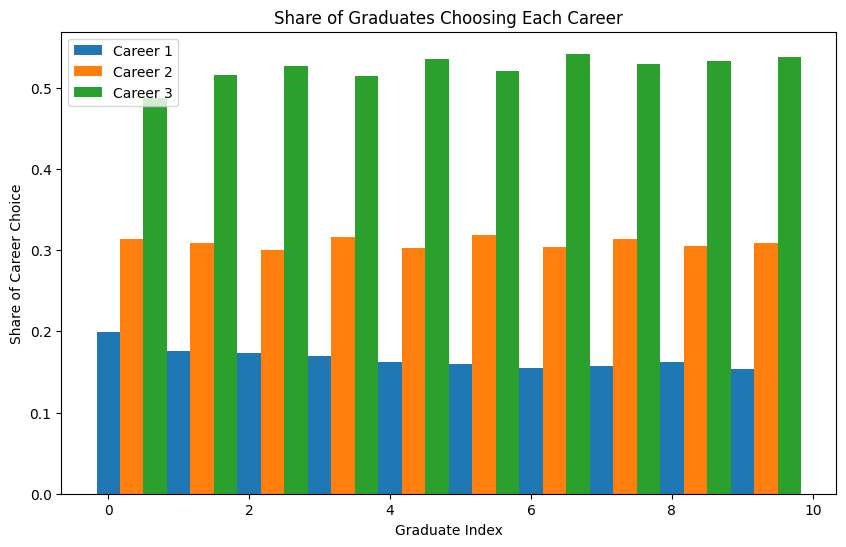

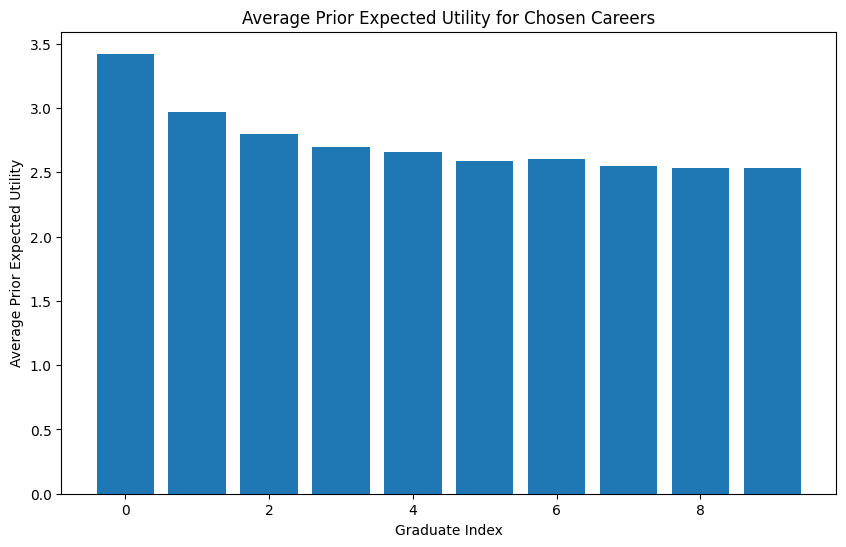

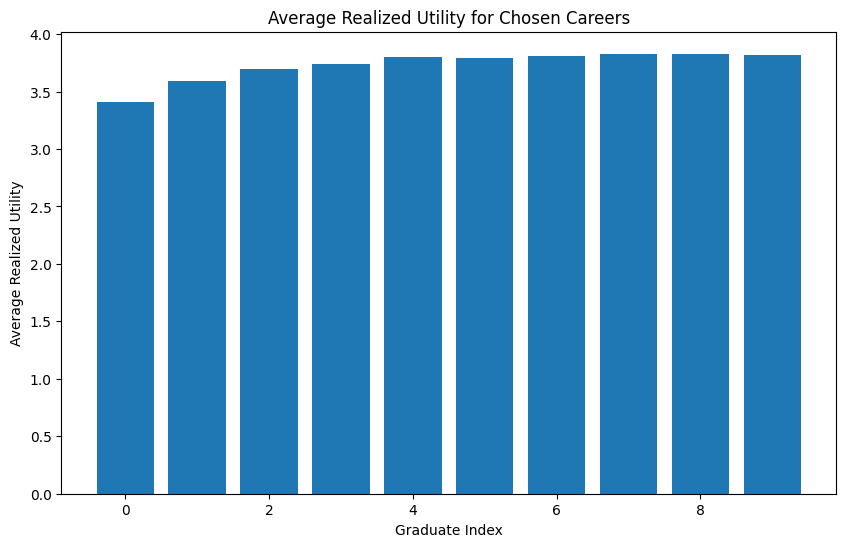

In [7]:
# I create arrays to store results
chosen_careers = np.zeros((par.N, par.K), dtype=int)
prior_expected_utilities = np.zeros((par.N, par.K))
realized_utilities = np.zeros((par.N, par.K))

# I simulate K times
for k in range(par.K):
    for i in range(par.N):
        Fi = par.F[i]
        priors = np.zeros(par.J)
        for j in range(par.J):
            friends_noise = np.random.normal(0, par.sigma, Fi)
            priors[j] = par.v[j] + np.mean(friends_noise)
        own_noise = np.random.normal(0, par.sigma, par.J)
        expected_utilities_with_own_noise = priors + own_noise
        chosen_career = np.argmax(expected_utilities_with_own_noise)
        
        chosen_careers[i, k] = chosen_career
        prior_expected_utilities[i, k] = priors[chosen_career]
        realized_utilities[i, k] = par.v[chosen_career] + own_noise[chosen_career]

# Source: I have used ChatGPT to help with the code development for the simulation.

# I calculate the averages
career_shares = np.mean(chosen_careers == np.arange(par.J)[:, None, None], axis=2).T
avg_prior_expected_utilities = np.mean(prior_expected_utilities, axis=1)
avg_realized_utilities = np.mean(realized_utilities, axis=1)

# I plot the results
plt.figure(figsize=(10, 6))
for j in range(par.J):
    plt.bar(np.arange(par.N) + j/par.J, career_shares[:, j], width=1/par.J, label=f'Career {j+1}')
plt.xlabel('Graduate Index')
plt.ylabel('Share of Career Choice')
plt.title('Share of Graduates Choosing Each Career')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(np.arange(par.N), avg_prior_expected_utilities)
plt.xlabel('Graduate Index')
plt.ylabel('Average Prior Expected Utility')
plt.title('Average Prior Expected Utility for Chosen Careers')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(np.arange(par.N), avg_realized_utilities)
plt.xlabel('Graduate Index')
plt.ylabel('Average Realized Utility')
plt.title('Average Realized Utility for Chosen Careers')
plt.show()

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

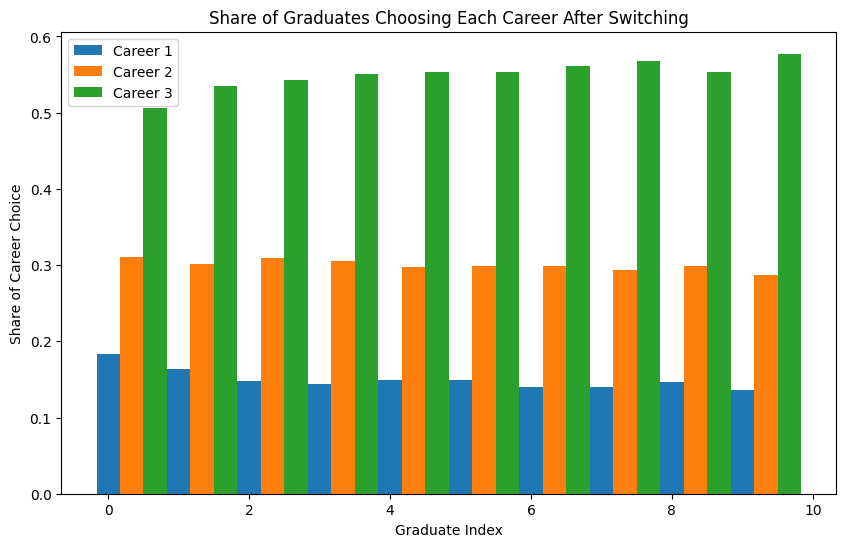

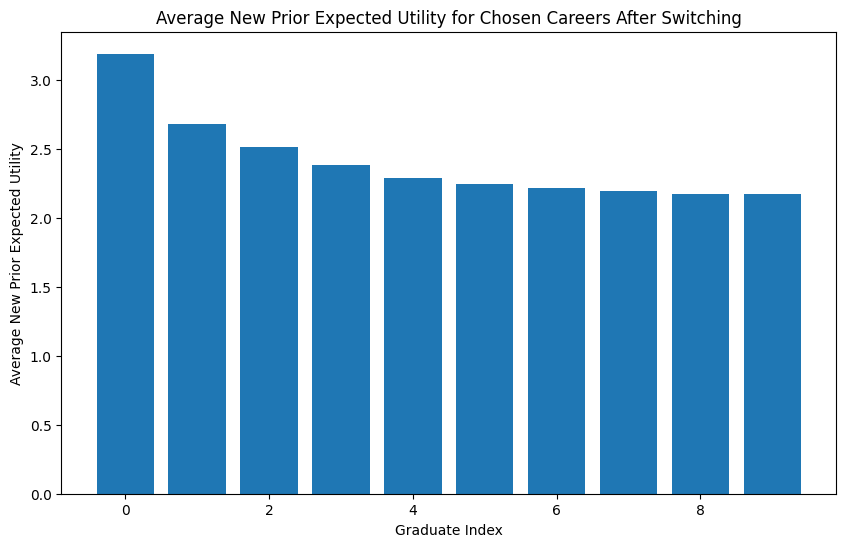

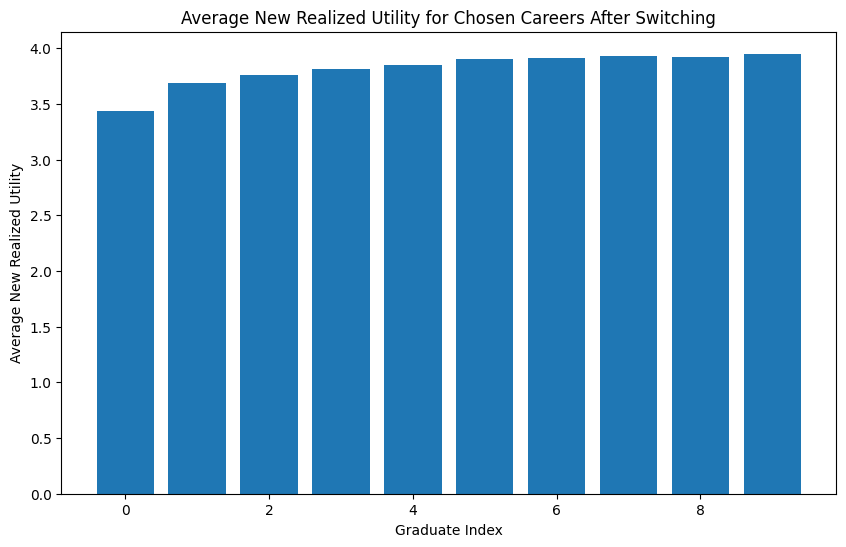

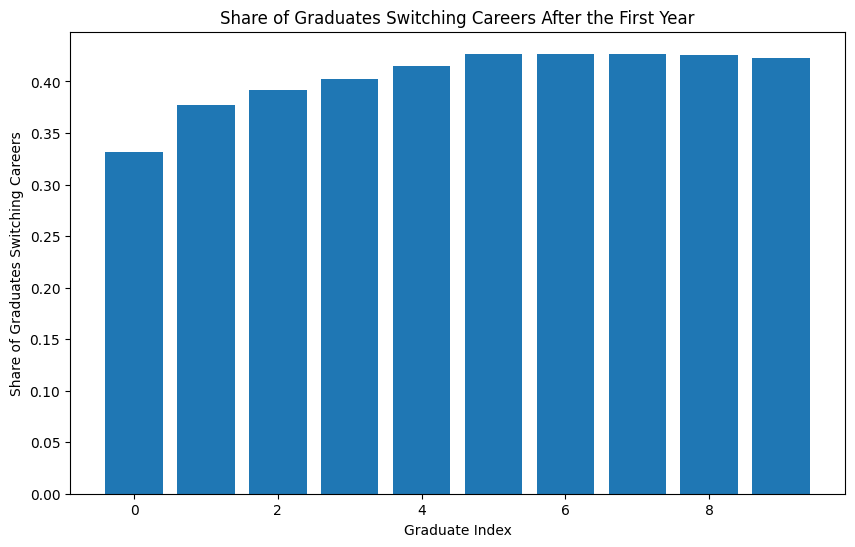

In [8]:
# I create arrays to store results for the second year
new_chosen_careers = np.zeros((par.N, par.K), dtype=int)
new_prior_expected_utilities = np.zeros((par.N, par.K))
new_realized_utilities = np.zeros((par.N, par.K))
switch_decision = np.zeros((par.N, par.K), dtype=int)

# I simulate K times
for k in range(par.K):
    for i in range(par.N):
        Fi = par.F[i]
        priors = np.zeros(par.J)
        for j in range(par.J):
            friends_noise = np.random.normal(0, par.sigma, Fi)
            priors[j] = par.v[j] + np.mean(friends_noise)
        own_noise = np.random.normal(0, par.sigma, par.J)
        expected_utilities_with_own_noise = priors + own_noise
        chosen_career = np.argmax(expected_utilities_with_own_noise)
        
        chosen_careers[i, k] = chosen_career
        prior_expected_utilities[i, k] = priors[chosen_career]
        realized_utilities[i, k] = par.v[chosen_career] + own_noise[chosen_career]
        
        # Evaluate switching options
        new_priors = np.copy(priors)
        for j in range(par.J):
            if j != chosen_career:
                new_priors[j] -= par.c
        
        new_own_noise = np.random.normal(0, par.sigma, par.J)
        new_expected_utilities_with_own_noise = new_priors + new_own_noise
        new_chosen_career = np.argmax(new_expected_utilities_with_own_noise)
        
        new_chosen_careers[i, k] = new_chosen_career
        new_prior_expected_utilities[i, k] = new_priors[new_chosen_career]
        new_realized_utilities[i, k] = (par.v[new_chosen_career] + new_own_noise[new_chosen_career] 
                                        if new_chosen_career != chosen_career 
                                        else realized_utilities[i, k])
        switch_decision[i, k] = int(new_chosen_career != chosen_career)

# Source: Again, I have used ChatGPT to help with the simulation

# I calculate the averages
new_career_shares = np.mean(new_chosen_careers == np.arange(par.J)[:, None, None], axis=2).T
avg_new_prior_expected_utilities = np.mean(new_prior_expected_utilities, axis=1)
avg_new_realized_utilities = np.mean(new_realized_utilities, axis=1)
switch_shares = np.mean(switch_decision, axis=1)

# I plot the results
plt.figure(figsize=(10, 6))
for j in range(par.J):
    plt.bar(np.arange(par.N) + j/par.J, new_career_shares[:, j], width=1/par.J, label=f'Career {j+1}')
plt.xlabel('Graduate Index')
plt.ylabel('Share of Career Choice')
plt.title('Share of Graduates Choosing Each Career After Switching')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(np.arange(par.N), avg_new_prior_expected_utilities)
plt.xlabel('Graduate Index')
plt.ylabel('Average New Prior Expected Utility')
plt.title('Average New Prior Expected Utility for Chosen Careers After Switching')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(np.arange(par.N), avg_new_realized_utilities)
plt.xlabel('Graduate Index')
plt.ylabel('Average New Realized Utility')
plt.title('Average New Realized Utility for Chosen Careers After Switching')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(np.arange(par.N), switch_shares)
plt.xlabel('Graduate Index')
plt.ylabel('Share of Graduates Switching Careers')
plt.title('Share of Graduates Switching Careers After the First Year')
plt.show()

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [9]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

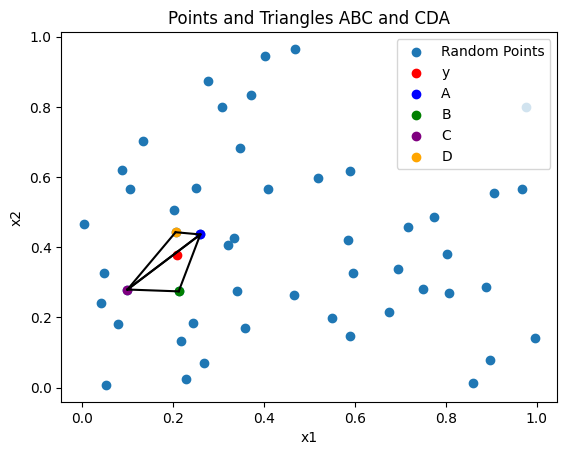

A: [0.26071605 0.43635845]
B: [0.21315735 0.274245  ]
C: [0.10056103 0.27951775]
D: [0.20634391 0.44272557]


In [10]:
# I import the functions generate_random_points and find_points that generates random points and finds the points A, B, C, and D
X, F = exam1.generate_random_points(seed=2024)
A, B, C, D = exam1.find_points(X, y)

# I plot the points and the triangles
plt.scatter(X[:, 0], X[:, 1], label='Random Points')
plt.scatter(*y, color='red', label='y')
plt.scatter(*A, color='blue', label='A')
plt.scatter(*B, color='green', label='B')
plt.scatter(*C, color='purple', label='C')
plt.scatter(*D, color='orange', label='D')

# I plot the triangles ABC and CDA
plt.plot([A[0], B[0]], [A[1], B[1]], color='black')
plt.plot([B[0], C[0]], [B[1], C[1]], color='black')
plt.plot([C[0], A[0]], [C[1], A[1]], color='black')

plt.plot([C[0], D[0]], [C[1], D[1]], color='black')
plt.plot([D[0], A[0]], [D[1], A[1]], color='black')
plt.plot([A[0], C[0]], [A[1], C[1]], color='black')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points and Triangles ABC and CDA')
plt.show()

print("A:", A)
print("B:", B)
print("C:", C)
print("D:", D)

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [11]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

In [12]:
# I import the function barycentric_coordinates and compute the barycentric coordinates with respect to triangles ABC and CDA
rABC = exam1.barycentric_coordinates(A, B, C, y)
rCDA = exam1.barycentric_coordinates(C, D, A, y)

# I check if y is inside any of the triangles
inside_ABC = all(0 <= r <= 1 for r in rABC)
inside_CDA = all(0 <= r <= 1 for r in rCDA)

# I print the results
print(f"Barycentric coordinates for ABC: {rABC}, inside ABC: {inside_ABC}")
print(f"Barycentric coordinates for CDA: {rCDA}, inside CDA: {inside_CDA}")

Barycentric coordinates for ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682), inside ABC: True
Barycentric coordinates for CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054), inside CDA: False


**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [13]:
# I import the function interpolate_f_for_y and compute true value of f(y) and the approximate value of f(y)
f_true = y[0] * y[1]
f_approx = exam1.interpolate_f_for_y(y, X, F)
print(f"True value of f(y): {f_true:.5f}")
print(f"Approximated value of f(y): {f_approx:.5f}")

True value of f(y): 0.07896
Approximated value of f(y): 0.08405


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [14]:
# The following Y values are given
Y = [(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.8, 0.2), (0.5, 0.5)]

# I import process_points
results = exam1.process_points(Y, X, F)

# I plot the results (as a DataFrame, so it is more manageable)
df_results = pd.DataFrame(results, columns=['Point', 'Approximated Value', 'True Value'])
print(df_results.to_string(index=False))

     Point  Approximated Value  True Value
(0.2, 0.2)            0.040326        0.04
(0.8, 0.2)            0.158742        0.16
(0.8, 0.8)                 NaN        0.64
(0.8, 0.2)            0.158742        0.16
(0.5, 0.5)            0.251290        0.25
